# Definição do Problema

**Qual é a descrição do problema?**

A violência contra a mulher é uma grave violação de direitos humanos, e o feminicídio — o assassinato de mulheres em razão de seu gênero — representa sua forma mais extrema. O presente trabalho busca analisar dados públicos do Instituto de Segurança Pública do Rio de Janeiro, focando nos casos de feminicídio consumado e tentativas de feminicídio, ao longo dos anos e meses disponíveis na base. O objetivo é identificar padrões temporais, tendências e possíveis pontos de atenção que ajudem a compreender melhor o comportamento desse tipo de crime ao longo do tempo.


**Este é um problema de aprendizado supervisionado ou não supervisionado?**

Este trabalho não envolve um problema de aprendizado de máquina. Trata-se de uma análise exploratória com foco em estatísticas descritivas, visualização e preparação dos dados, sem o uso de modelos preditivos.


**Que premissas ou hipóteses você tem sobre o problema?**

Espera-se que existam picos sazonais nos dados (por exemplo, em determinados meses ou anos).
Pode haver diferença na proporção entre feminicídios consumados e tentativas, e essa proporção pode variar com o tempo.
Eventos sociais, políticos ou institucionais podem ter impactado os números de forma perceptível em determinados períodos.


**Que restrições ou condições foram impostas para selecionar os dados?**

Foram utilizados apenas dados públicos disponibilizados pelo Instituto de Segurança Pública do RJ.
O conjunto de dados foi escolhido com base em sua relevância social, atualidade e simplicidade estrutural, para possibilitar uma análise significativa.

### **Dicionário de dados**


| Variável              | Descrição da variável                                                   |
|-----------------------|-------------------------------------------------------------------------|
| cisp                  | Número da circunscrição de delegacia onde ocorreu o fato               |
| vano                  | Ano da comunicação da ocorrência                                        |
| mes                   | Mês da comunicação da ocorrência                                        |
| feminicidio           | Número de vítimas de feminicídio                                        |
| feminicidio_tentativa | Número de vítimas de tentativa de feminicídio                           |
| fase                  | 2 - Consolidado sem errata<br>3 - Consolidado com errata                |


# Análise de Dados

# Instalações

In [1]:
# !pip install nbformat pandas matplotlib

# Importações

In [2]:
import nbformat

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import json
import requests

In [3]:
# verificacao erro 
# print(nbformat.__version__)

# Coleta dos Dados


O dataset utilizado na análise foi baixado no site de dados abertos do [Institudo de Segurança Pública do Rio de Janeiro](https://www.ispdados.rj.gov.br/) e salvo no Github do projeto para facilitar a importação. 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/nanquinote/mvp-analise-feminicidios/main/BaseFeminicidioEvolucaoMensalCisp.csv', encoding='latin1', sep=';')

# Análise Exploratória dos Dados

### Dataset Feminicídio

In [5]:
display(df.head(5))

,CISP,AISP,RISP,Município,Mês,Ano,Feminicídio,Tentativa de feminicídio,Fase
0,1,5,1,Rio de Janeiro,4,2025,0,0,2
1,4,5,1,Rio de Janeiro,4,2025,0,0,2
2,5,5,1,Rio de Janeiro,4,2025,0,0,2
3,6,4,1,Rio de Janeiro,4,2025,0,0,2
4,7,5,1,Rio de Janeiro,4,2025,0,2,2


Abaixo, podemos verificar que o dataset possui 9 colunas (atributos) e 14960 linhas (instâncias).

In [6]:
df.shape

(14960, 9)

Além disso, nenhuma linha possui valor nulo em nenhuma das colunas, além de ter apenas uma coluna do tipo string (object), enquanto as outras são numéricas do tipo inteiro.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14960 entries, 0 to 14959
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CISP                      14960 non-null  int64 
 1   AISP                      14960 non-null  int64 
 2   RISP                      14960 non-null  int64 
 3   Município                 14960 non-null  object
 4   Mês                       14960 non-null  int64 
 5   Ano                       14960 non-null  int64 
 6   Feminicídio               14960 non-null  int64 
 7   Tentativa de feminicídio  14960 non-null  int64 
 8   Fase                      14960 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.0+ MB


A análise descritiva mostra que os dados abrangem o período de 2016 a 2025, com distribuição mensal aparentemente uniforme. A maioria dos registros apresenta 0 casos, tanto de tentativas quanto de realizações, indicando que as ocorrências são esparsas e concentradas em momentos e locais.

In [8]:
df.describe()

,CISP,AISP,RISP,Mês,Ano,Feminicídio,Tentativa de feminicídio,Fase
count,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000
mean,84.553476,21.269118,4.006818,6.445722,2020.598396,0.050401,0.169719,2.931217
std,48.286672,11.476208,2.026717,3.515096,2.468752,0.236402,0.499086,0.253094
min,1.000000,2.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,2.000000
25%,40.000000,10.000000,2.000000,3.000000,2018.000000,0.000000,0.000000,3.000000
50%,89.000000,23.000000,4.000000,6.000000,2021.000000,0.000000,0.000000,3.000000
75%,128.000000,32.000000,6.000000,10.000000,2023.000000,0.000000,0.000000,3.000000
max,168.000000,43.000000,7.000000,12.000000,2025.000000,4.000000,8.000000,3.000000


# Limpeza e pré-processamento dos dados

Será feita também uma verificação nos dados de cada coluna para ver se não há nenhum erro ou discrepância nos dados, como diferenças na grafia de palavras

In [9]:
for column in df.columns:
    print(f'{column.upper()}:\n{df[column].unique()}\n')

CISP:
[  1   4   5   6   7   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  48  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  70  71  72  73  74  75  76  77  78  79  81  82
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 104 105 106 107
 108 109 110 111 112 118 119 120 121 122 123 124 125 126 127 128 129 130
 132 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 151 152
 153 154 155 156 157 158 159 165 166 167 168  45]

AISP:
[ 5  4  2 23 19 31  6 22 16  3 41 18  9 14 40 27 17 24 20 39 15 21 34 35
  7 12 10 37 28 30 26 38 25 32  8 36 29 11 33 43]

RISP:
[1 2 3 4 5 7 6]

MUNICÍPIO:
['Rio de Janeiro' 'Seropédica' 'Itaguaí' 'Paracambi' 'Nova Iguaçu'
 'Mesquita' 'Belford Roxo' 'Queimados' 'Nilópolis' 'Duque de Caxias'
 'Japeri' 'São João de Meriti' 'Magé' 'Guapimirim' 'Tanguá' 'Itaboraí'
 'São Gonçalo' 'Niterói' 'Maricá' 'Barra do Piraí' 'Resende' 

É importante também verificar se existem linhas duplicadas, o que poderia causas redundâncias e análises incorretas.

In [10]:
# Verificar valores duplicados
df.duplicated().sum()

0

Serão criadas as colunas de data, estação do ano e total de ocorrências para facilitar as análises.

In [11]:
df['Data'] = pd.to_datetime(
    df[['Ano', 'Mês']]
    .rename(columns={'Ano': 'year', 'Mês': 'month'})
    .assign(day=1)
)

df['Ocorrências'] = df['Feminicídio'] + df['Tentativa de feminicídio']


def estacao_do_ano(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

df['Estacao'] = df['Mês'].apply(estacao_do_ano)

In [12]:
df.columns

Index(['CISP', 'AISP', 'RISP', 'Município', 'Mês', 'Ano', 'Feminicídio',
       'Tentativa de feminicídio', 'Fase', 'Data', 'Ocorrências', 'Estacao'],
      dtype='object')

### Verificando outliers

Como podemos observar abaixo, não foram observados outliers no dataset pois os valores das variáveis estão concentrados em um intervalo pequeno e discreto.

In [13]:
df.describe()

,CISP,AISP,RISP,Mês,Ano,Feminicídio,Tentativa de feminicídio,Fase,Data,Ocorrências
count,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960,14960.000000
mean,84.553476,21.269118,4.006818,6.445722,2020.598396,0.050401,0.169719,2.931217,2021-01-19 00:34:39.144385024,0.220120
min,1.000000,2.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,2.000000,2016-11-01 00:00:00,0.000000
25%,40.000000,10.000000,2.000000,3.000000,2018.000000,0.000000,0.000000,3.000000,2018-12-01 00:00:00,0.000000
50%,89.000000,23.000000,4.000000,6.000000,2021.000000,0.000000,0.000000,3.000000,2021-02-01 00:00:00,0.000000
75%,128.000000,32.000000,6.000000,10.000000,2023.000000,0.000000,0.000000,3.000000,2023-03-01 00:00:00,0.000000
max,168.000000,43.000000,7.000000,12.000000,2025.000000,4.000000,8.000000,3.000000,2025-04-01 00:00:00,8.000000
std,48.286672,11.476208,2.026717,3.515096,2.468752,0.236402,0.499086,0.253094,NaN,0.577687


# Análise Exploratória de Dados

## Frequência temporal

A seguir, analisamos a distribuição dos casos de feminicídio e tentativas ao longo do tempo, agrupando-os por mês e por ano para identificar tendências e padrões sazonais.

In [14]:
# meses com dados em cada ano
df.groupby('Ano')['Mês'].unique().sort_index()


Ano
2016                                   [12, 11]
2017    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2018    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2019    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2020    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2021    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2022    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2023    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2024    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2025                               [4, 3, 2, 1]
Name: Mês, dtype: object

### Gráfico de evolução mensal a cada ano

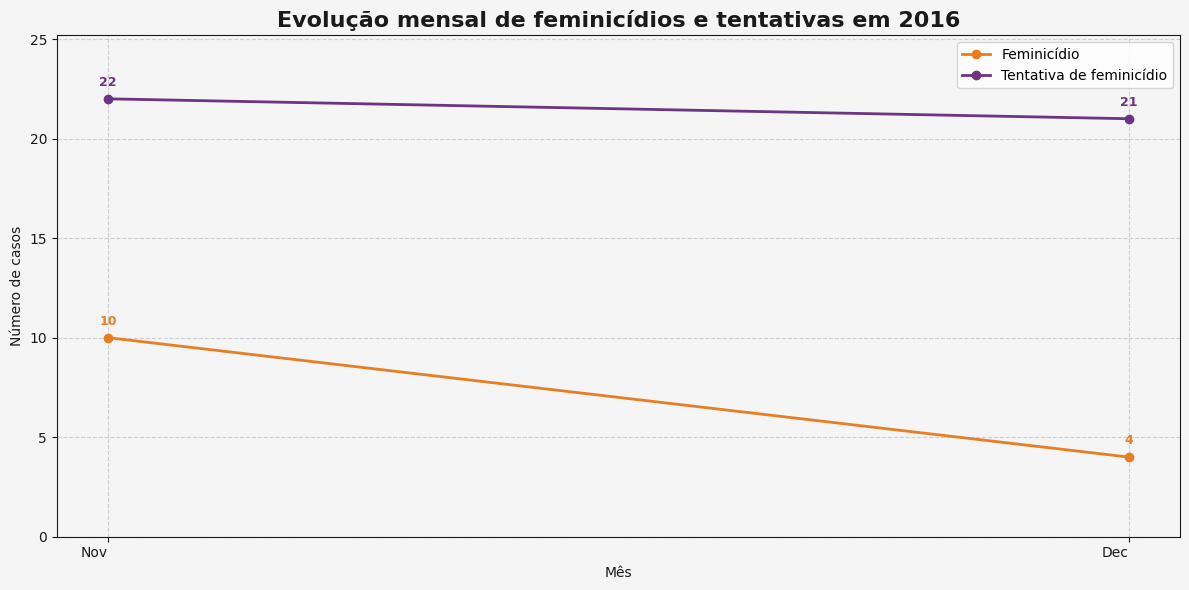

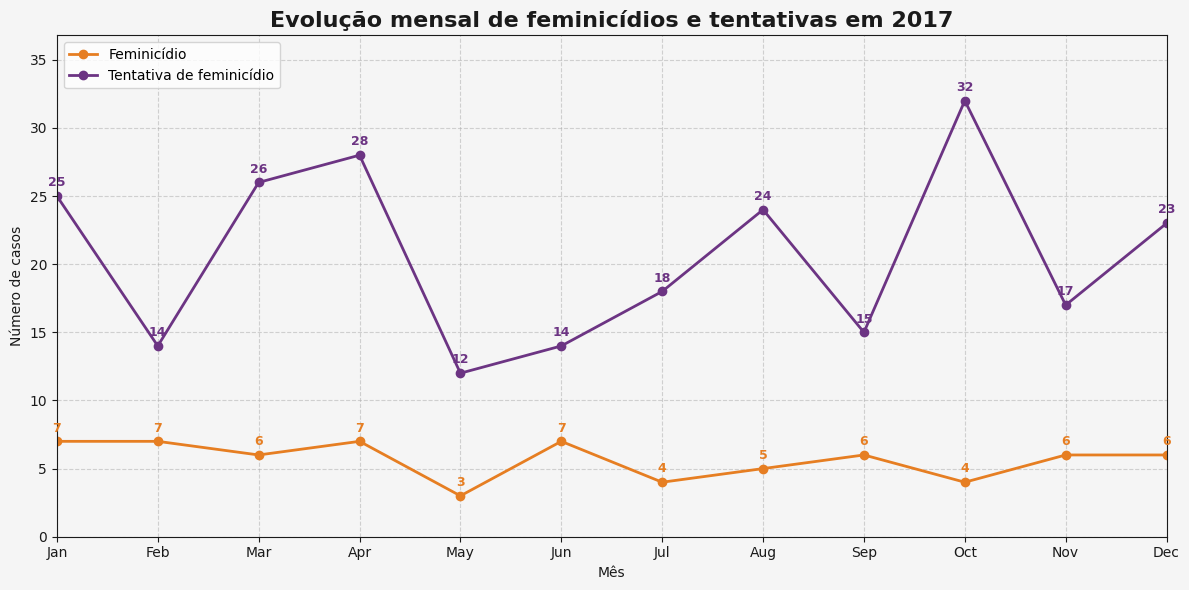

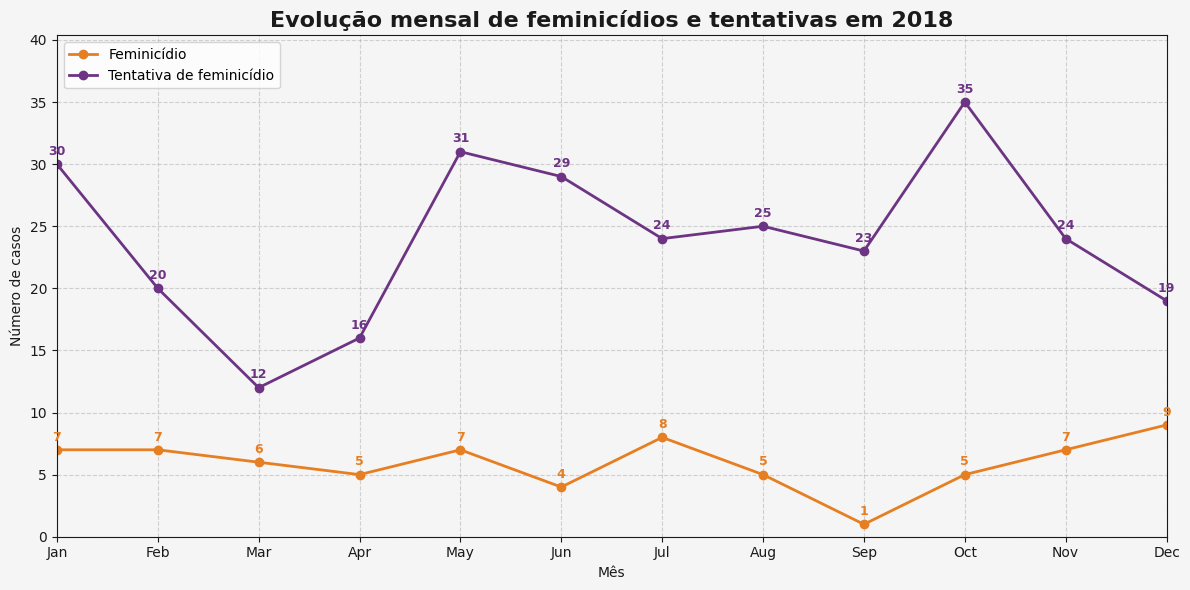

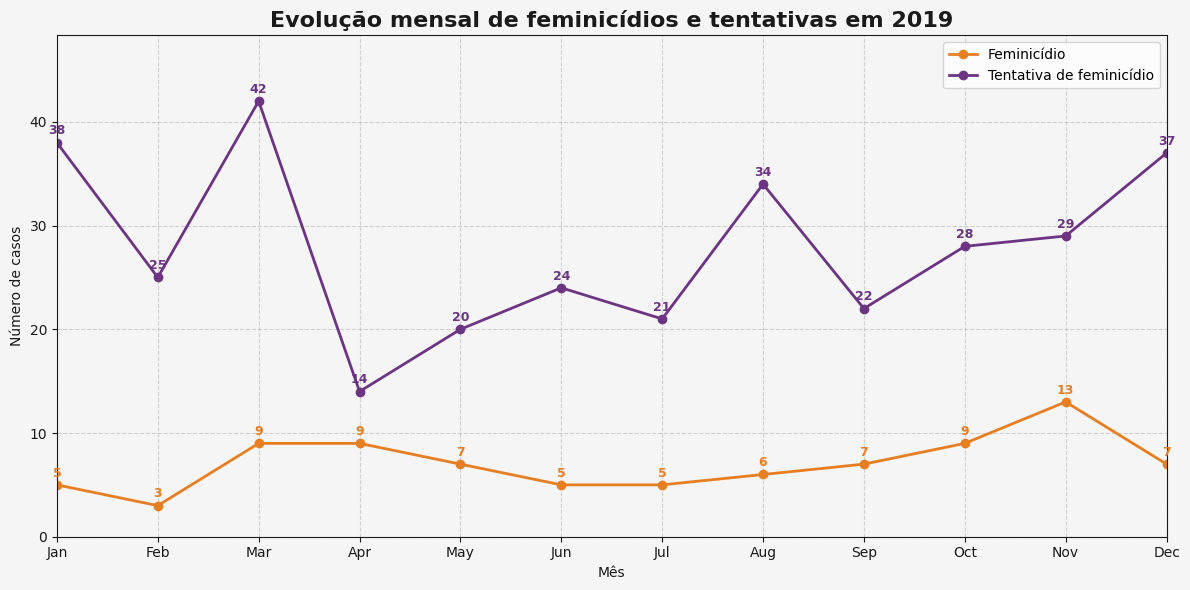

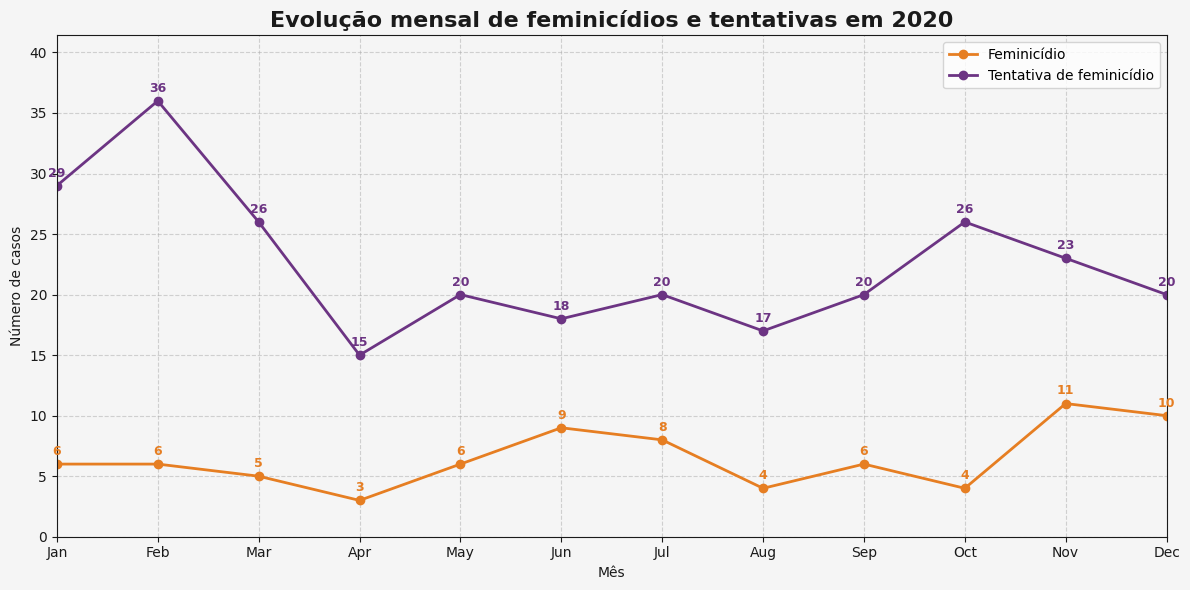

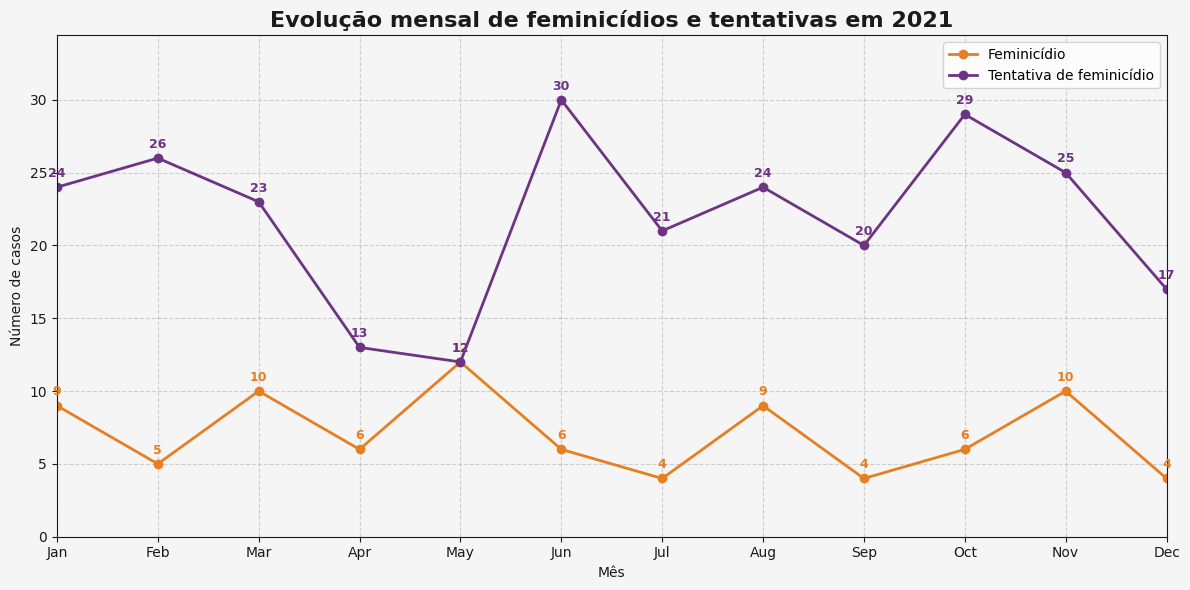

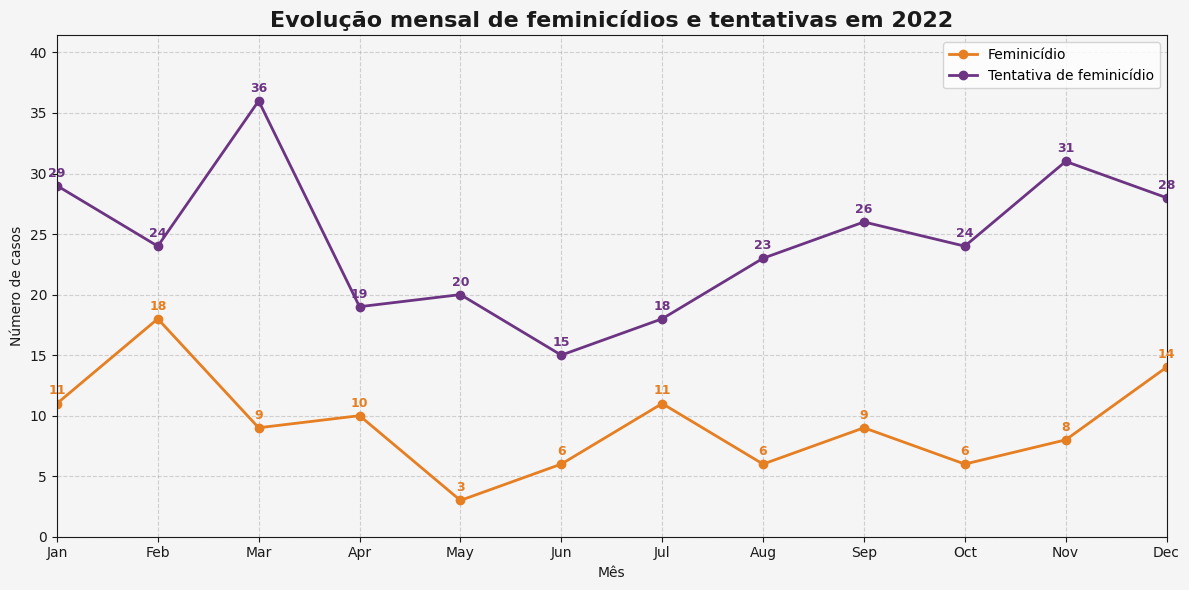

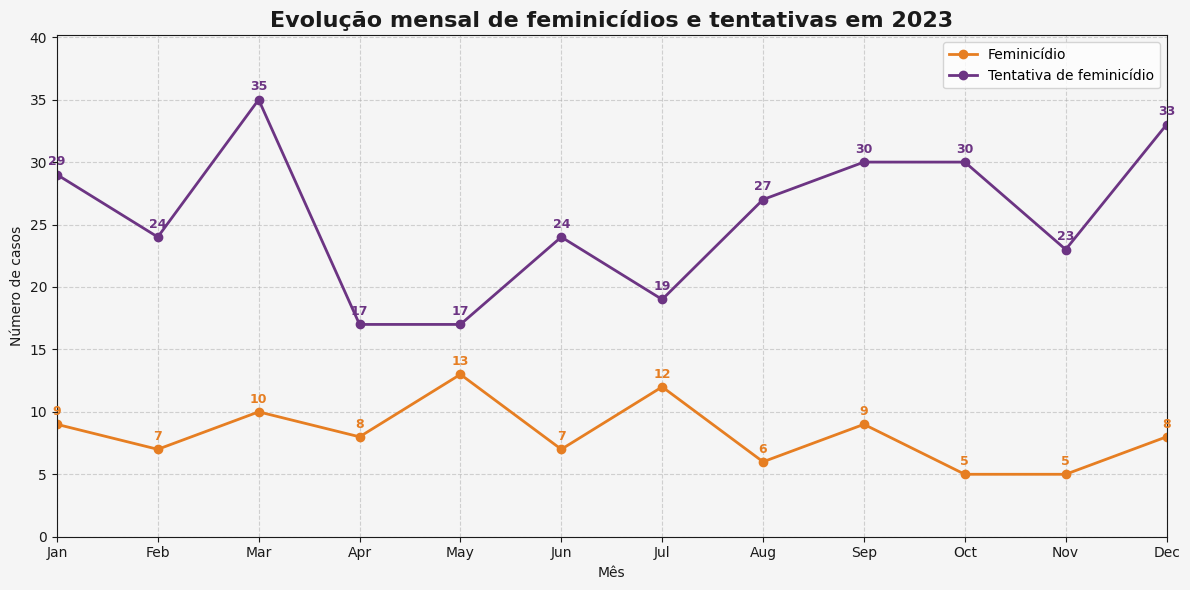

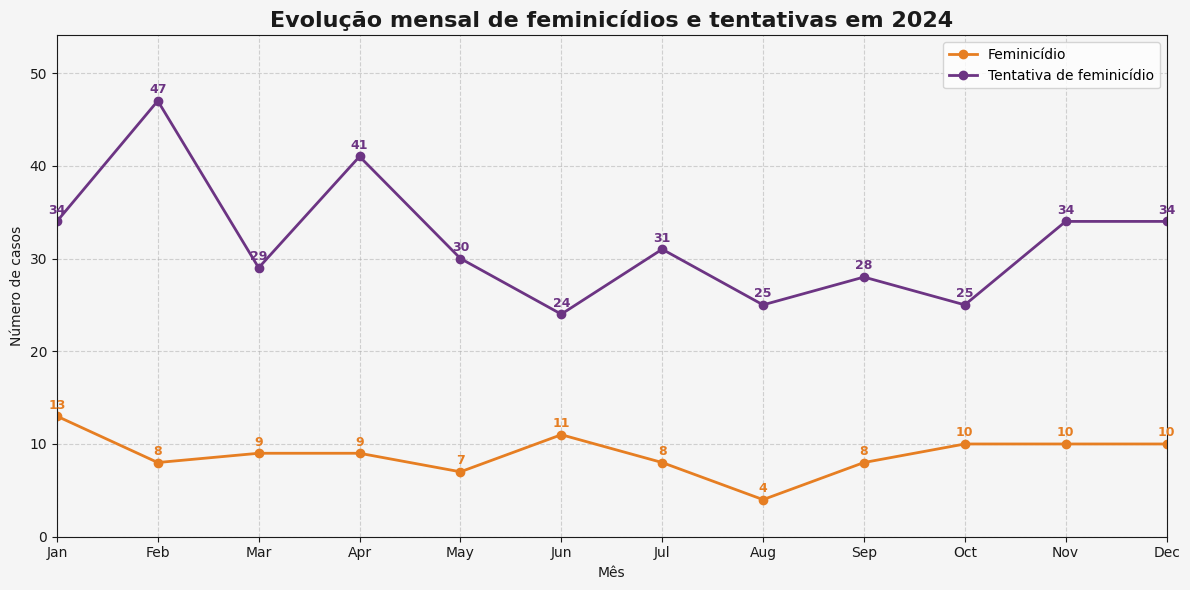

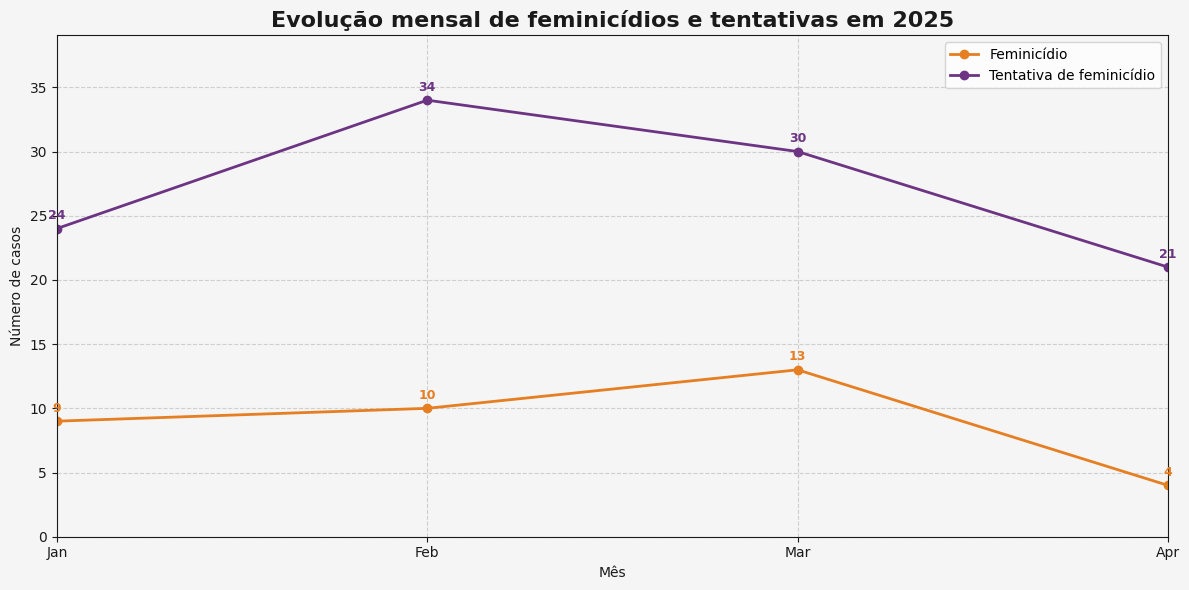

In [15]:
mensal_agrupado = (
    df.groupby(['Ano', 'Mês'])[['Feminicídio', 'Tentativa de feminicídio']]
    .sum()
    .reset_index()
)

mensal_agrupado['Data_Mes'] = pd.to_datetime(
    mensal_agrupado.rename(columns={'Ano': 'year', 'Mês': 'month'})[['year', 'month']]
    .assign(day=1)
)


tema_cores = {
    'fundo_figura': '#F5F5F5',
    'fundo_grafico': '#F5F5F5',
    'feminicidio': '#E67E22',
    'tentativa': '#6C3483',
    'ocorrencias': '#6C3483',
    'texto': '#1A1A1A',
    'grade': '#AAAAAA',
    'borda': '#1A1A1A'
}

anos = mensal_agrupado['Ano'].unique()

for ano in sorted(anos):
    dados_ano = mensal_agrupado[mensal_agrupado['Ano'] == ano].set_index('Data_Mes')

    fig, ax = plt.subplots(figsize=(12,6))
    fig.patch.set_facecolor(tema_cores['fundo_figura'])
    ax.set_facecolor(tema_cores['fundo_grafico'])

    dados_ano[['Feminicídio', 'Tentativa de feminicídio']].plot(
        ax=ax,
        linewidth=2,
        marker='o',
        color=[tema_cores['feminicidio'], tema_cores['tentativa']]
    )

    for index, value in dados_ano['Feminicídio'].items():
        ax.text(index, value + 0.5, f'{int(value)}',
                ha='center', va='bottom', fontsize=9, color=tema_cores['feminicidio'], weight='bold')


    for index, value in dados_ano['Tentativa de feminicídio'].items():
        ax.text(index, value + 0.5, f'{int(value)}',
                ha='center', va='bottom', fontsize=9, color=tema_cores['tentativa'], weight='bold')


    plt.title(f'Evolução mensal de feminicídios e tentativas em {ano}', fontsize=16, weight='bold', color=tema_cores['texto'])
    plt.ylabel('Número de casos', color=tema_cores['texto'])
    plt.xlabel('Mês', color=tema_cores['texto'])
    ax.tick_params(colors=tema_cores['texto'])

    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

    plt.grid(True, linestyle='--', color=tema_cores['grade'], alpha=0.5)

    for spine in ax.spines.values():
        spine.set_color(tema_cores['borda'])

    ax.set_xticks(dados_ano.index)
    ax.set_xticklabels([d.strftime('%b') for d in dados_ano.index])
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

Nesta primeira análise, pode-se observar que o número de tentativas é bem maior do que o de casos consumados em todos os gráficos. 

Em relação a flutuação mensal, os números não são constantes de um mês para o outro e apresentam picos e quedas bem acentuados, sugerindo que a ocorrência desses crimes pode ser influenciada por fatores sozonais ou eventos específicos.

Em resumo, os gráficos mostram que a dimensão do problema da violência contra a mulher é ainda mais alarmante do que o número de casos consumados sugere, pois demonstram um cenário de violência contínua.

## Evolução Anual

In [16]:
anual = df.groupby('Ano')[['Ocorrências']].sum()

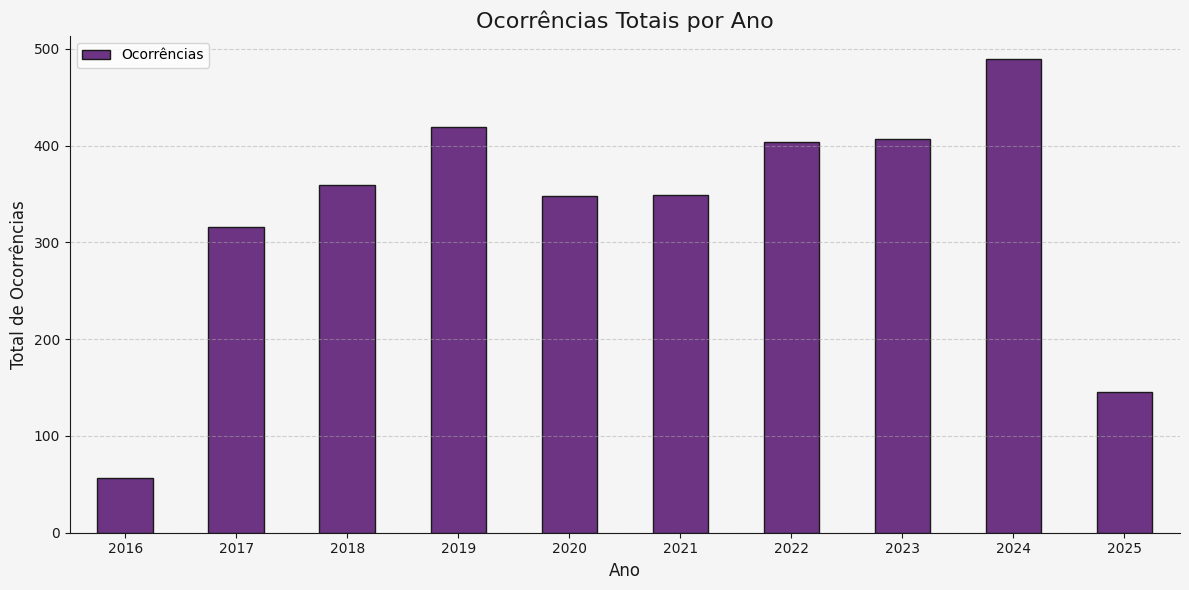

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(tema_cores['fundo_figura'])
ax.set_facecolor(tema_cores['fundo_grafico'])

anual.plot(
    ax=ax,
    kind='bar',
    color=tema_cores['ocorrencias'],
    edgecolor=tema_cores['borda']
)

# Estilização
ax.set_title('Ocorrências Totais por Ano', fontsize=16, color=tema_cores['texto'])
ax.set_xlabel('Ano', fontsize=12, color=tema_cores['texto'])
ax.set_ylabel('Total de Ocorrências', fontsize=12, color=tema_cores['texto'])
ax.tick_params(axis='x', colors=tema_cores['texto'], rotation=0)
ax.tick_params(axis='y', colors=tema_cores['texto'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(tema_cores['borda'])
ax.spines['bottom'].set_color(tema_cores['borda'])
ax.grid(axis='y', linestyle='--', alpha=0.5, color=tema_cores['grade'])

plt.tight_layout()
plt.show()

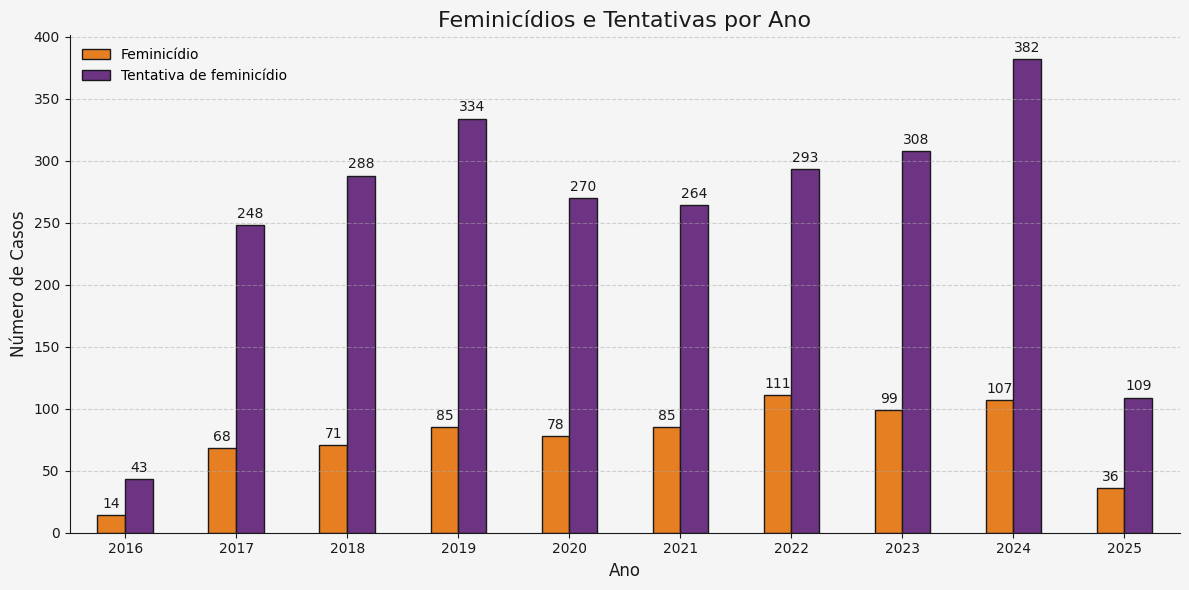

In [18]:
anual = df.groupby('Ano')[['Feminicídio', 'Tentativa de feminicídio']].sum()

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(tema_cores['fundo_figura'])
ax.set_facecolor(tema_cores['fundo_grafico'])

bars = anual.plot(
    kind='bar',
    ax=ax,
    color=[tema_cores['feminicidio'], tema_cores['tentativa']],
    edgecolor=tema_cores['borda']
)

# Adicionar rótulos de valor acima de cada barra
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # deslocamento vertical
                        textcoords="offset points",
                        ha='center', va='bottom',
                        color=tema_cores['texto'], fontsize=10)

ax.set_title('Feminicídios e Tentativas por Ano', fontsize=16, color=tema_cores['texto'])
ax.set_xlabel('Ano', fontsize=12, color=tema_cores['texto'])
ax.set_ylabel('Número de Casos', fontsize=12, color=tema_cores['texto'])
ax.tick_params(axis='x', colors=tema_cores['texto'], rotation=0)
ax.tick_params(axis='y', colors=tema_cores['texto'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(tema_cores['borda'])
ax.spines['bottom'].set_color(tema_cores['borda'])
ax.grid(axis='y', linestyle='--', alpha=0.5, color=tema_cores['grade'])
ax.legend(labels=['Feminicídio', 'Tentativa de feminicídio'], facecolor=tema_cores['fundo_figura'], edgecolor='none')

plt.tight_layout()
plt.show()

Considerando apenas os anos com meses completos, nota-se um aumento de 54% nos casos de 2017 até 2024.

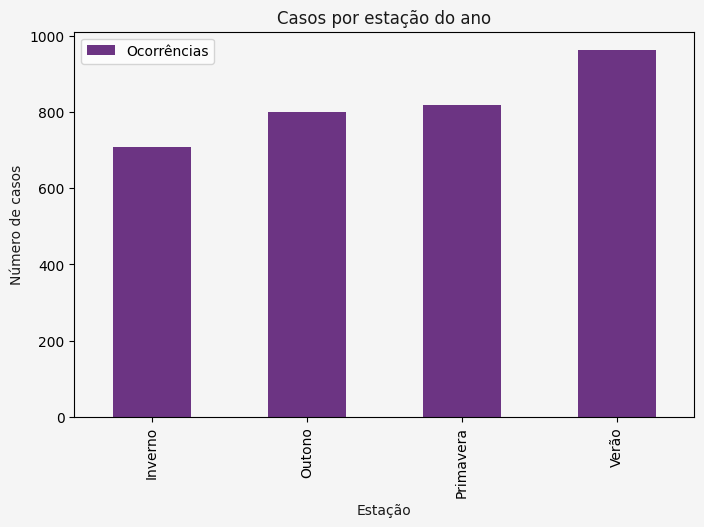

In [19]:
estacoes = df.groupby('Estacao')[['Ocorrências']].sum()

fig, ax = plt.subplots(figsize=(8,5))
fig.patch.set_facecolor(tema_cores['fundo_figura'])
ax.set_facecolor(tema_cores['fundo_grafico'])

estacoes[['Ocorrências']].plot(kind='bar', ax=ax, color=tema_cores['ocorrencias'])

plt.title('Casos por estação do ano', color=tema_cores['texto'])
plt.ylabel('Número de casos', color=tema_cores['texto'])
plt.xlabel('Estação', color=tema_cores['texto'])
plt.show()


Nota-se um pico de ocorrências durante o Verão, o que já foi verificado em outros estudos e que pode ser explicado devido a ser um período de férias de final de ano quando há um maior convívio entre as famílias

### Frequência Geográfica

### Mapa de calor por município

In [20]:
df_municipios = df.groupby('Município', as_index=False)[['Ocorrências']].sum()

#with open('municipios_rj.json', encoding='utf-8') as f:
#    geojson = json.load(f)

url = 'https://raw.githubusercontent.com/nanquinote/mvp-analise-feminicidios/refs/heads/main/municipios_rj.json'
response = requests.get(url)
geojson = response.json()


fig = px.choropleth(
    df_municipios,
    geojson=geojson,
    locations='Município',
    featureidkey='properties.name',
    color='Ocorrências',
    color_continuous_scale=["#F0EBF1", "#984FB4", "#5B097B"],  
    title='Mapa de Feminicídios por Município (RJ)'
)

fig.update_geos(
    fitbounds="locations",
    visible=False
)

fig.update_layout(
    paper_bgcolor=tema_cores['fundo_figura'],
    plot_bgcolor=tema_cores['fundo_grafico'],
    font_color=tema_cores['texto'],
    title_font_color=tema_cores['texto'],
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


Por fim, observa-se uma predominância de casos no Rio de Janeiro, Nova Iguaçu, Duque de Caxias, São Gonçalo e Campo dos Goytacazes, o que pode ser ao menos parcialmente explicado pela maior densidade demográfica nesses municípios.